<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Unsupervised_learning_Zomato_Restaurant_Clustering_and_sentiment_Analysis/blob/main/Unsupervised_learning_Zomato_Restaurant_Clustering_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato Restaurant Clustering and Sentiment Analysis**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math
import matplotlib.gridspec as gridspec
import warnings



### Dataset Loading

In [2]:

# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Data
path='/content/drive/MyDrive/Unsupervised learning project/'
reviews_df=pd.read_csv(path + 'Zomato Restaurant reviews.csv')
Metadata_df=pd.read_csv(path + 'Zomato Restaurant names and Metadata.csv')

### Dataset First View

In [4]:
#First View of Restaurant names and Metadata
Metadata_df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [5]:
#First view of reviews dataframe
reviews_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [6]:
reviews_df[reviews_df['Restaurant']=='Beyond Flavours']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
95,Beyond Flavours,Gaurav Saini,Was there for office lunch outing. Rating woul...,3,"5 Reviews , 7 Followers",5/4/2019 16:56,0
96,Beyond Flavours,Kailash Sain,I really enjoyed the follows....\nThe entrance...,5,1 Review,5/3/2019 20:10,0
97,Beyond Flavours,KAILASH SAIN,I came first time in this restaurant.\nThe ent...,5,1 Review,5/3/2019 20:06,0
98,Beyond Flavours,Yaswanth Chowdary,Pathetic and horrible experience\nAmbience and...,2,"4 Reviews , 56 Followers",5/3/2019 11:40,0


In [7]:
pd.DataFrame(reviews_df['Restaurant'].value_counts().sort_values(ascending=False))

,Restaurant
Beyond Flavours,100
Absolute Sizzlers,100
Flechazo,100
Shah Ghouse Hotel & Restaurant,100
Over The Moon Brew Company,100
...,...
Hyderabadi Daawat,100
Zega - Sheraton Hyderabad Hotel,100
Triptify,100
Squeeze @ The Lime,100


### Dataset Rows & Columns count

In [8]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Number of observation and feature for restaurant names and Metadata: {Metadata_df.shape}')
print(f'Number of observation and feature for reviews: {reviews_df.shape}')

Number of observation and feature for restaurant names and Metadata: (105, 6)
Number of observation and feature for reviews: (10000, 7)


### Dataset Information

In [9]:
Metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [11]:
# Checking for duplicates
duplicate_rows=Metadata_df[Metadata_df.duplicated()]

In [12]:
# Dataset Duplicate Value Count
len(duplicate_rows)

0

In [13]:




# Checking for duplicates
duplicate_rows=reviews_df[reviews_df.duplicated()]

In [14]:
# Dataset Duplicate Value Count
len(duplicate_rows)

36

In [15]:
duplicate_rows

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


There is no important inforamtion in duplicated rows so I am dropping the duplicated rows from reviews dataset.

In [16]:
# Droping the duplicated rows
reviews_df=reviews_df.drop_duplicates()
reviews_df.shape

(9964, 7)

#### Missing Values/Null Values

In [17]:
# Checking null values
Metadata_df.isna().sum().sort_values(ascending=False)

Collections    54
Timings         1
Name            0
Links           0
Cost            0
Cuisines        0
dtype: int64

In [18]:


#Visualizing missing values in Collections column
Metadata_df[Metadata_df['Collections'].isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


In [19]:
#visualizing the missing values in Timings column
Metadata_df[Metadata_df['Timings'].isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [20]:


# Checking null values
reviews_df.isna().sum().sort_values(ascending=False)

Review        9
Reviewer      2
Rating        2
Metadata      2
Time          2
Restaurant    0
Pictures      0
dtype: int64

In [21]:

#visualizing missing values in review column
reviews_df[reviews_df['Review'].isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [22]:


#visualizing the missing values in columns Reviewer, rating ,metadata and time
nullreviews=reviews_df[reviews_df['Reviewer'].isna()]

In [23]:


nullreviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


In [24]:
#dropping data with null values in all rows except restaurant name 
reviews_df.drop(nullreviews.index,inplace=True)

<ipython-input-24-8f3441c05b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.drop(nullreviews.index,inplace=True)


In [25]:
reviews_df.shape

(9962, 7)

### What did you know about your datasets?

There are two data sets Metadata dataset and reviews data set received from zomato. 
For Metadata Dataset:

I have found that the Metadata datset contains 105 rows and 6 columns. I have found there are no duplicate rows in the dataset. There are 54 rows with missing values present in columns Collection and 1 row with missing values in timings. I have not replaced or removed any missing values.

For Reviews dataset

I have found that the reviews dataset has 10000 rows and 7 columns. I have found that there are 36 duplicate rows. I have dropped all duplicate rows. I also found that there are 9 missing values of reviewer and 2 missing values in each column of review, reviewer, rating, Metadata and Time. I have observed that for the two rows, American Wild Wings and Arena Eleven has no reviews, ratings,metadata and we dont have the timings of the hotel. so I have dropperd these two rows. The final reviews dataset has 9962 rows and 7 columns.   

## ***2. Understanding Your Variables***

In [26]:
Metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [27]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [28]:
# Dataset Describe Metadata
Metadata_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [29]:


# Dataset Describe reviews of object data type
reviews_df.describe(include='object')

,Restaurant,Reviewer,Review,Rating,Metadata,Time
count,9962,9962,9955,9962,9962,9962
unique,100,7446,9364,10,2477,9782
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34
freq,100,13,237,3832,919,3


In [30]:
# Dataset Describe reviews of numerical datatype
reviews_df.describe()

,Pictures
count,9962.000000
mean,0.751456
std,2.574863
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description 


**Zomato Restaurant names and Metadata**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

**Zomato Restaurant Reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

In [31]:
# Check Unique Values for each variable for Metadata
for i in Metadata_df.columns.tolist():
  print("No. of unique values in ",i,"is",Metadata_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [32]:
# Check Unique Values for each variable for reviews
for i in reviews_df.columns.tolist():
  print("No. of unique values in ",i,"is",reviews_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:

#creating copy of both the data
metadata = Metadata_df.copy()
review = reviews_df.copy()

In [34]:
#before changing data type for cost checking values
metadata['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

We can see that comma "," present in the cost column is making the values in the column as object data type. So I have decided to convert object data type to integer data type

In [35]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
metadata['Cost'] = metadata['Cost'].str.replace(",","").astype('int64')

In [36]:
#Checking the values of changes made
metadata['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [37]:
#assigning restaurant name to index
metadata.index=metadata['Name']

In [38]:
#dropping Name column
metadata.drop(['Name'],axis=1)

,Links,Cost,Collections,Cuisines,Timings
Name,,,,,
Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM


In [39]:
# replace NaN values with Blank spaces
metadata=metadata.replace(np.nan, '')

In [40]:
# spliting the cusines and storing in list 
cuisine_value_list = metadata.Cuisines.str.split(', ')
#Cusine_value_list dataset view
cuisine_value_list

Name
Beyond Flavours                           [Chinese, Continental, Kebab, European, South ...
Paradise                                                   [Biryani, North Indian, Chinese]
Flechazo                                     [Asian, Mediterranean, North Indian, Desserts]
Shah Ghouse Hotel & Restaurant            [Biryani, North Indian, Chinese, Seafood, Beve...
Over The Moon Brew Company                [Asian, Continental, North Indian, Chinese, Me...
                                                                ...                        
IndiBlaze                                                                [Fast Food, Salad]
Sweet Basket                                                               [Bakery, Mithai]
Angaara Counts 3                                           [North Indian, Biryani, Chinese]
Wich Please                                                                     [Fast Food]
Republic Of Noodles - Lemon Tree Hotel                    [Thai, Asian, Chi

In [41]:
#using explode on list to get unique values in dataset
unique_values=list(cuisine_value_list.explode().unique())

In [42]:
#create new column with all zero values
metadata['number of cusine']=0

In [43]:
#for loop to find the number of cuisines and list of cuisines provided by the restaurant.
for x in range(len(cuisine_value_list)):
  metadata['number of cusine'][x]=len(cuisine_value_list[x])
  metadata['Cuisines'][x]=cuisine_value_list[x]

<ipython-input-43-7fba838c5899>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['number of cusine'][x]=len(cuisine_value_list[x])
<ipython-input-43-7fba838c5899>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['Cuisines'][x]=cuisine_value_list[x]


In [44]:
# spliting the cusines and storing in list 
collections_value_list = metadata.Collections.str.split(', ')

In [45]:
#using explode on list to get unique values in collections dataset
unique_collection_values=list(collections_value_list.explode().unique())

In [46]:
#finding length of unique collection values
len(unique_collection_values)

38

In [47]:
#for loop to find the list of collections provided by the restaurant.
for x in range(len(collections_value_list)):
  metadata['Collections'][x]=collections_value_list[x]

<ipython-input-47-89bac882c8d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['Collections'][x]=collections_value_list[x]


In [48]:
#dataset view
metadata

,Name,Links,Cost,Collections,Cuisines,Timings,number of cusine
Name,,,,,,,
Beyond Flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6
Paradise,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 AM to 11 PM,3
Flechazo,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4
Shah Ghouse Hotel & Restaurant,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,5
Over The Moon Brew Company,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaura...","[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5
...,...,...,...,...,...,...,...
IndiBlaze,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,[],"[Fast Food, Salad]",11 AM to 11 PM,2
Sweet Basket,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,[],"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",2
Angaara Counts 3,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,[],"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,3


In [49]:
# function to create boolean values of cuisine if present in cuisine list of the hotel
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [50]:
#implimenting the boolean_df function
cuisine_bool = boolean_df(item_lists = metadata["Cuisines"],unique_items = unique_values)

In [51]:
#Adding hotel names to the cuisine_bool dataset
cuisine_bool.index=metadata['Name']

In [52]:
#view of cuisine_bool dataset
cuisine_bool

,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Asian,Mediterranean,Desserts,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Paradise,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Flechazo,False,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Shah Ghouse Hotel & Restaurant,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Over The Moon Brew Company,True,True,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sweet Basket,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Angaara Counts 3,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
#assign null values in collection to blank spaces
metadata[metadata['Collections'].isna()]['Collections']=''

In [54]:
#implimenting the boolean_df function
collections_bool = boolean_df(item_lists = metadata["Collections"],unique_items = unique_collection_values)
collections_bool

,Food Hygiene Rated Restaurants in Hyderabad,Corporate Favorites,Great Buffets,Top-Rated,Gold Curated,Live Sports Screenings,Hyderabad's Hottest,Late Night Restaurants,Best Bars & Pubs,Sunday Brunches,...,Regional Favorites,Pan-Asian Delicacies,Terrific Thalis,Sneak Peek Hyderabad,Ramzan Mubarak,Best Milkshakes,Top Drinking Destinations,Best Bakeries,New on Gold,Brilliant Biryanis
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Paradise,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Flechazo,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Shah Ghouse Hotel & Restaurant,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Over The Moon Brew Company,True,False,False,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sweet Basket,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angaara Counts 3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
#Adding hotel names to the Collection_bool dataset
collections_bool.index=metadata['Name']

In [56]:
cuisine_frequency=np.sum(cuisine_bool, axis = 0)
cuisine_frequency

Chinese          43
Continental      21
Kebab             6
European          4
South Indian      9
North Indian     61
Biryani          16
Asian            15
Mediterranean     5
Desserts         13
Seafood           4
Beverages         5
Goan              1
Healthy Food      1
Lebanese          1
American          6
Ice Cream         2
Street Food       2
Fast Food        15
BBQ               2
Italian          14
Finger Food       2
Burger            5
Japanese          2
Salad             5
Sushi             4
Mexican           1
Mughlai           6
Andhra            6
Bakery            7
Juices            1
Arabian           2
Hyderabadi        4
Cafe              6
Spanish           1
Wraps             1
Thai              3
Indonesian        1
Modern Indian     2
Momos             4
Pizza             1
North Eastern     1
Mithai            1
Malaysian         1
dtype: int64

In [57]:
cuisine_count=np.sum(cuisine_bool, axis = 1)
cuisine_count

Name
Beyond Flavours                           6
Paradise                                  3
Flechazo                                  4
Shah Ghouse Hotel & Restaurant            5
Over The Moon Brew Company                5
                                         ..
IndiBlaze                                 2
Sweet Basket                              2
Angaara Counts 3                          3
Wich Please                               1
Republic Of Noodles - Lemon Tree Hotel    4
Length: 105, dtype: int64

In [58]:
#Convert Metadata column into Total reviews and followers
review['Total_Review'],review['Total_Followers']=review['Metadata'].str.split(',').str
review['Total_Review'] = pd.to_numeric(review['Total_Review'].str.split(' ').str[0])
review['Total_Followers'] = pd.to_numeric(review['Total_Followers'].str.split(' ').str[1])

<ipython-input-58-b64f4d6ad2bc>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Total_Review'],review['Total_Followers']=review['Metadata'].str.split(',').str


In [59]:
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Total_Review,Total_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0


In [60]:
#merging metadata and cuisine_bool
metadata=pd.merge(metadata, cuisine_bool, left_index=True, right_index=True)

In [61]:
metadata

,Name,Links,Cost,Collections,Cuisines,Timings,number of cusine,Chinese,Continental,Kebab,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Paradise,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 AM to 11 PM,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Flechazo,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Shah Ghouse Hotel & Restaurant,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM,5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Over The Moon Brew Company,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaura...","[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,[],"[Fast Food, Salad]",11 AM to 11 PM,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sweet Basket,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,[],"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Angaara Counts 3,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,[],"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,3,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
#shape after merging cuisine_bool
metadata.shape

(105, 51)

In [63]:
#merging metadata and collection_bool
metadata=pd.merge(metadata, collections_bool, left_index=True, right_index=True)

In [64]:
#shape after merging collections_bool
metadata.shape

(105, 89)

In [65]:
#converting string values of rating to numeric
review['Rating'] = pd.to_numeric(review['Rating'],errors='coerce')

In [66]:
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Total_Review,Total_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0


In [67]:
#Using group by on review
rating_df=review.groupby('Restaurant').agg({'Review':"count",    # Sum duration per group
                                  'Rating': "mean",  # get the count of networks
                                  'Pictures': sum  # get the first date per group
                                  }
                                 )

In [68]:
#view of rating_df created by groupby of review dataframe
rating_df

,Review,Rating,Pictures
Restaurant,,,
10 Downing Street,100,3.80,105
13 Dhaba,100,3.48,41
"3B's - Buddies, Bar & Barbecue",100,4.76,13
AB's - Absolute Barbecues,100,4.88,24
Absolute Sizzlers,100,3.62,45
...,...,...,...
Urban Asia - Kitchen & Bar,100,3.65,178
Yum Yum Tree - The Arabian Food Court,100,3.56,129
Zega - Sheraton Hyderabad Hotel,100,4.45,83


In [69]:
#renaming index
rating_df.index.name='Name'
rating_df

,Review,Rating,Pictures
Name,,,
10 Downing Street,100,3.80,105
13 Dhaba,100,3.48,41
"3B's - Buddies, Bar & Barbecue",100,4.76,13
AB's - Absolute Barbecues,100,4.88,24
Absolute Sizzlers,100,3.62,45
...,...,...,...
Urban Asia - Kitchen & Bar,100,3.65,178
Yum Yum Tree - The Arabian Food Court,100,3.56,129
Zega - Sheraton Hyderabad Hotel,100,4.45,83


In [70]:
#merging metadata and rating_df
metadata=pd.merge(metadata, rating_df, left_index=True, right_index=True)

In [71]:
#--------------------------------------------------------------------------------------------------------------------------#

In [72]:
# Create Fuction to find inter Quartile ranges of a dataframe
def df_Quartile(dataframe,column):
  Q1=dataframe[column].describe()['25%']
  Q3=dataframe[column].describe()['75%']
  Top=dataframe[dataframe[column]>=Q3]
  Bottom=dataframe[dataframe[column]<=Q1]
  plot_data=[dataframe,column,Top,Bottom,Q1,Q3]
  return plot_data

In [73]:
#Use the fuction df_quartile on different Columns
#on 'Cost' column
cost_plot_pass=df_Quartile(metadata,'Cost')
#on Pictures column
pictures_plot_pass=df_Quartile(metadata,'Pictures')
#on number of cuisines
cuisines_plot_pass=df_Quartile(metadata,'number of cusine')
#on number of ratings
rating_plot_pass=df_Quartile(metadata,'Rating')


In [74]:
#Create Fuction to plot inter Quartile ranges of a dataframe
# Set the warning filter to "ignore"
warnings.filterwarnings("ignore")

def my_plot(my_list):
  fig= plt.figure(figsize=(20,20))
  gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
  # Plot the first axis on the first row
  ax0 = fig.add_subplot(gs[0, :2])
  ax0.bar((my_list[0][my_list[1]]).index,(my_list[0][my_list[1]]).values,color='cyan')
  ax0.axhline(my_list[4],color='green',label='25% IQR')
  ax0.axhline(my_list[5],color='red',label='75% IQR')
  ax0.set_title('Total')
  ax0.set_xlabel('X Label')
  ax0.set_ylabel('Y Label') 
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
  # Plot the second and third axes on the second row
  ax1 = fig.add_subplot(gs[1, 0])
  ax1.bar((my_list[2][my_list[1]]).index,(my_list[2][my_list[1]]).values,color='red')
  ax1.set_title('Highest')
  ax1.set_xlabel('X Label')
  ax1.set_ylabel('Y Label')
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
  ax2 = fig.add_subplot(gs[1, 1])
  ax2.bar((my_list[3][my_list[1]]).index,(my_list[3][my_list[1]]).values,color='green')
  ax2.set_title('Lowest')
  ax2.set_xlabel('X Label')
  ax2.set_ylabel('Y Label')
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
  # Adjust the layout and display the plot
  plt.tight_layout()
  plt.show()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Cuisines of different hotels

<Axes: title={'center': 'Most Prefered Cuisine'}, ylabel='None'>

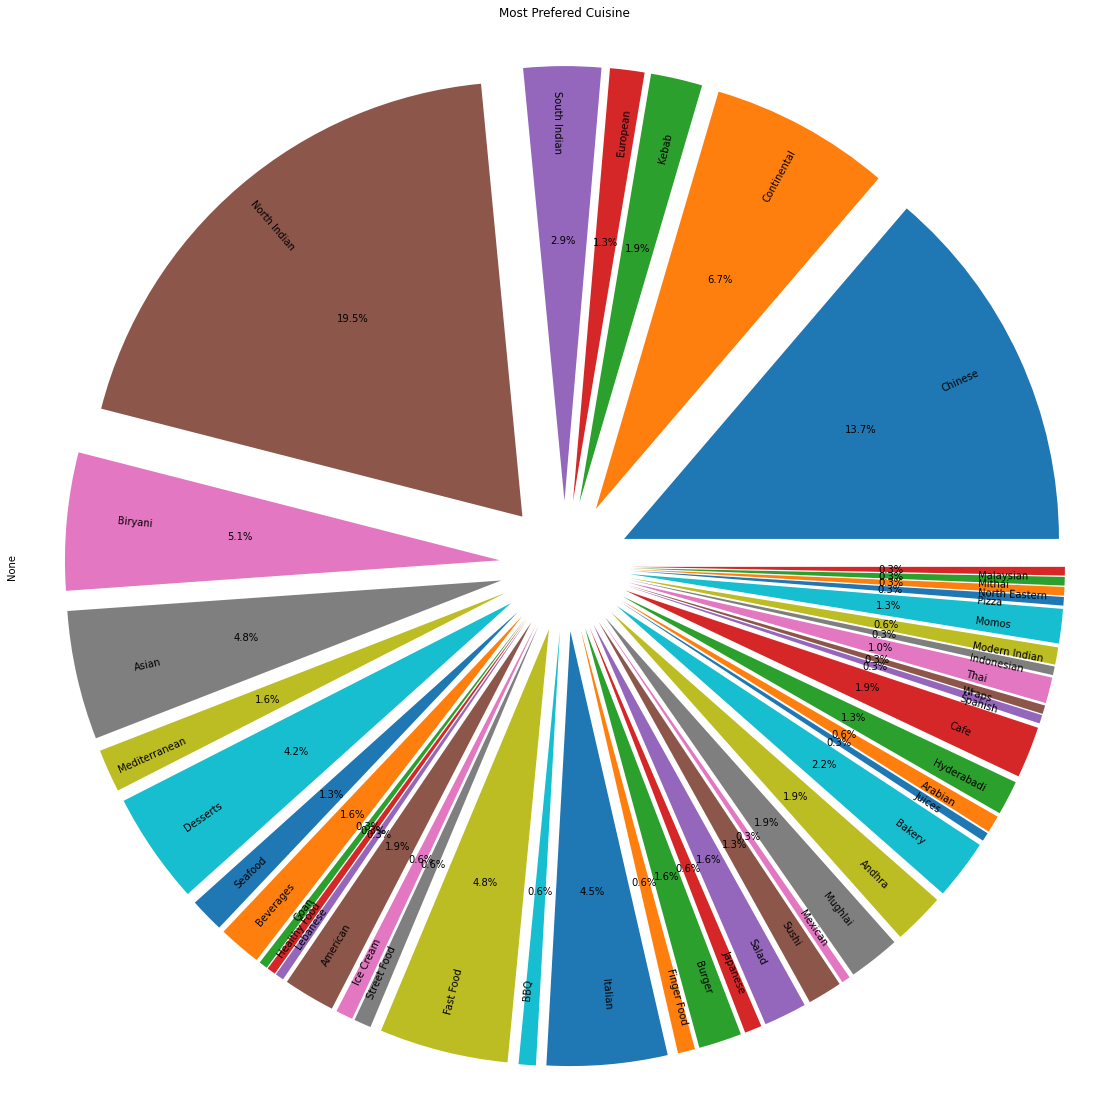

In [75]:
#Visualizing the cuisine prefferences of the hotels
explode=[0.15]*len(cuisine_frequency)
cuisine_frequency.plot(kind='pie',autopct='%1.1f%%',figsize=(20,20),explode=explode,title='Most Prefered Cuisine',labeldistance=0.8,rotatelabels = 270)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

I have found that Nort Indian cuisine and Chinese cuisine is highly offered cuisine by the hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph we can clearly understand the most important cuisines offered by the hotels. This indicates that the customers are highly choosing the north Indian cuisine, chinese cuisine. So, Zomato can target on customers intrested in these cuisine through marketing.

#### Chart - 2 - Bar Chart on Number of different Cuisines offered by different hotels

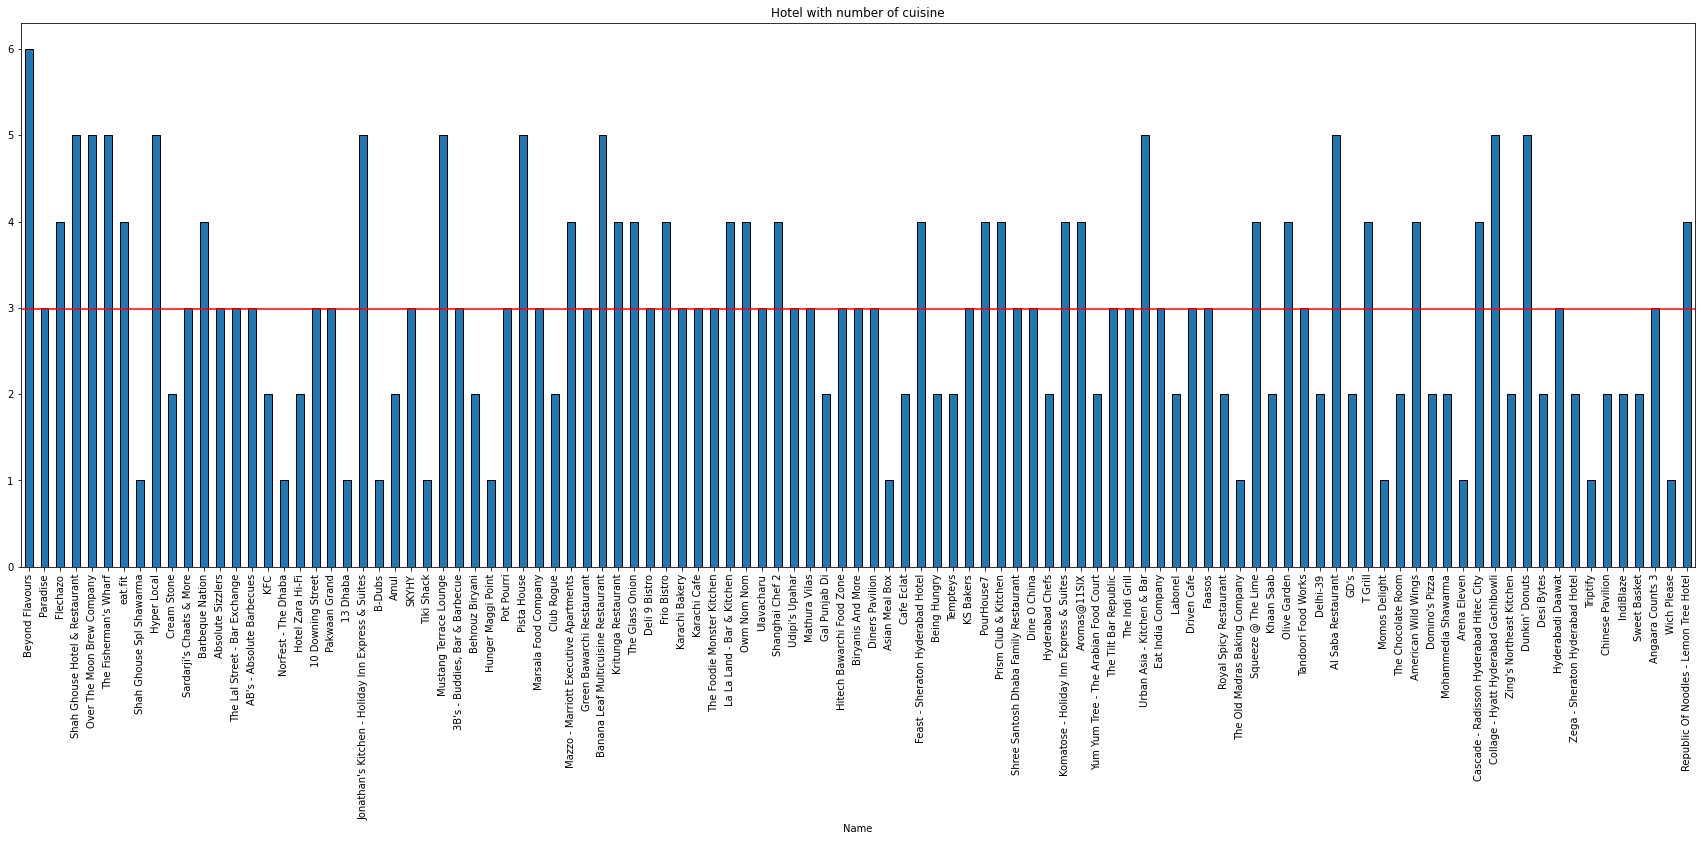

In [76]:
#Number of cuisine varites offered by hotel.
cuisine_count.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Hotel with number of cuisine')
plt.axhline(cuisine_count.mean(),color='red')

#### Chart - 3 - Bar Chart on Costs of different hotels

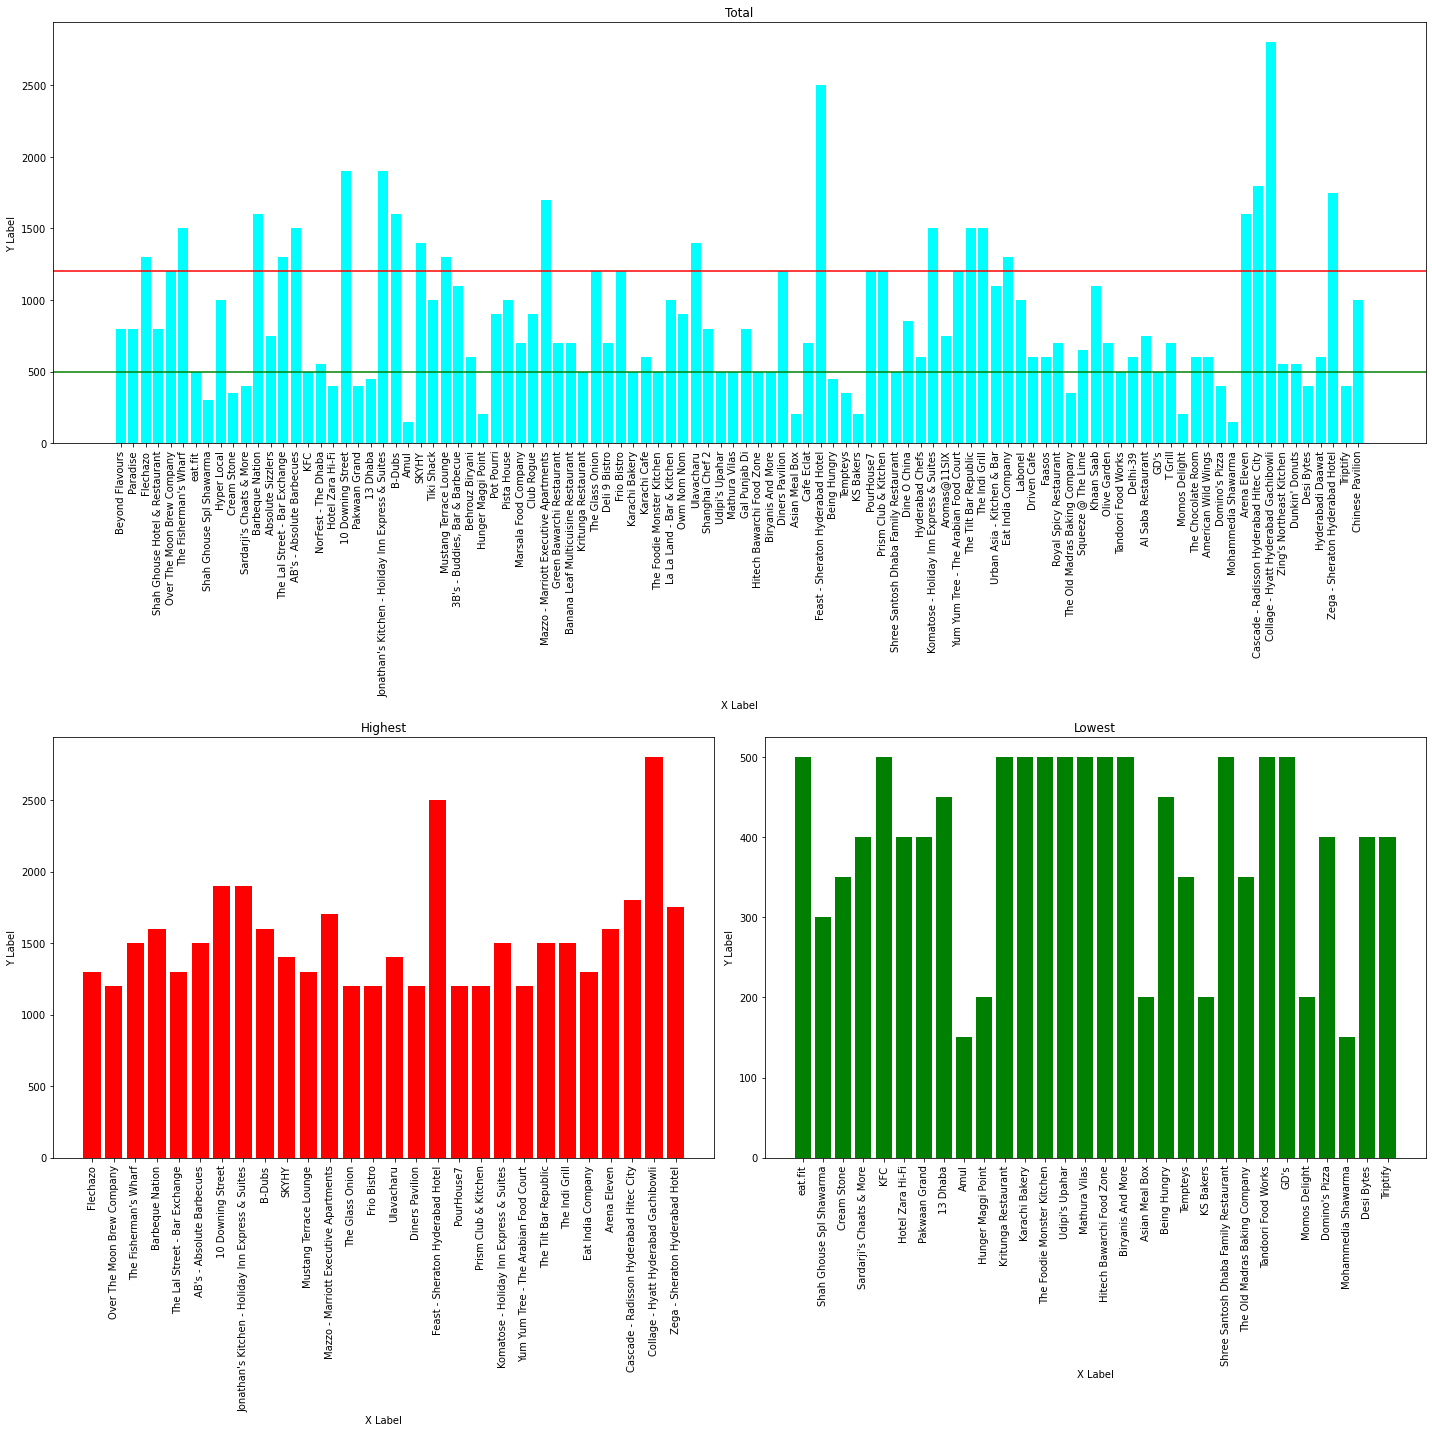

In [77]:
#visualization of plot
my_plot(cost_plot_pass)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I have made the following conclusions:
*  College-Hyatt Hyderabad Gachibowli has the highest price among the hotels.
*  Amul has the lowest price among the hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

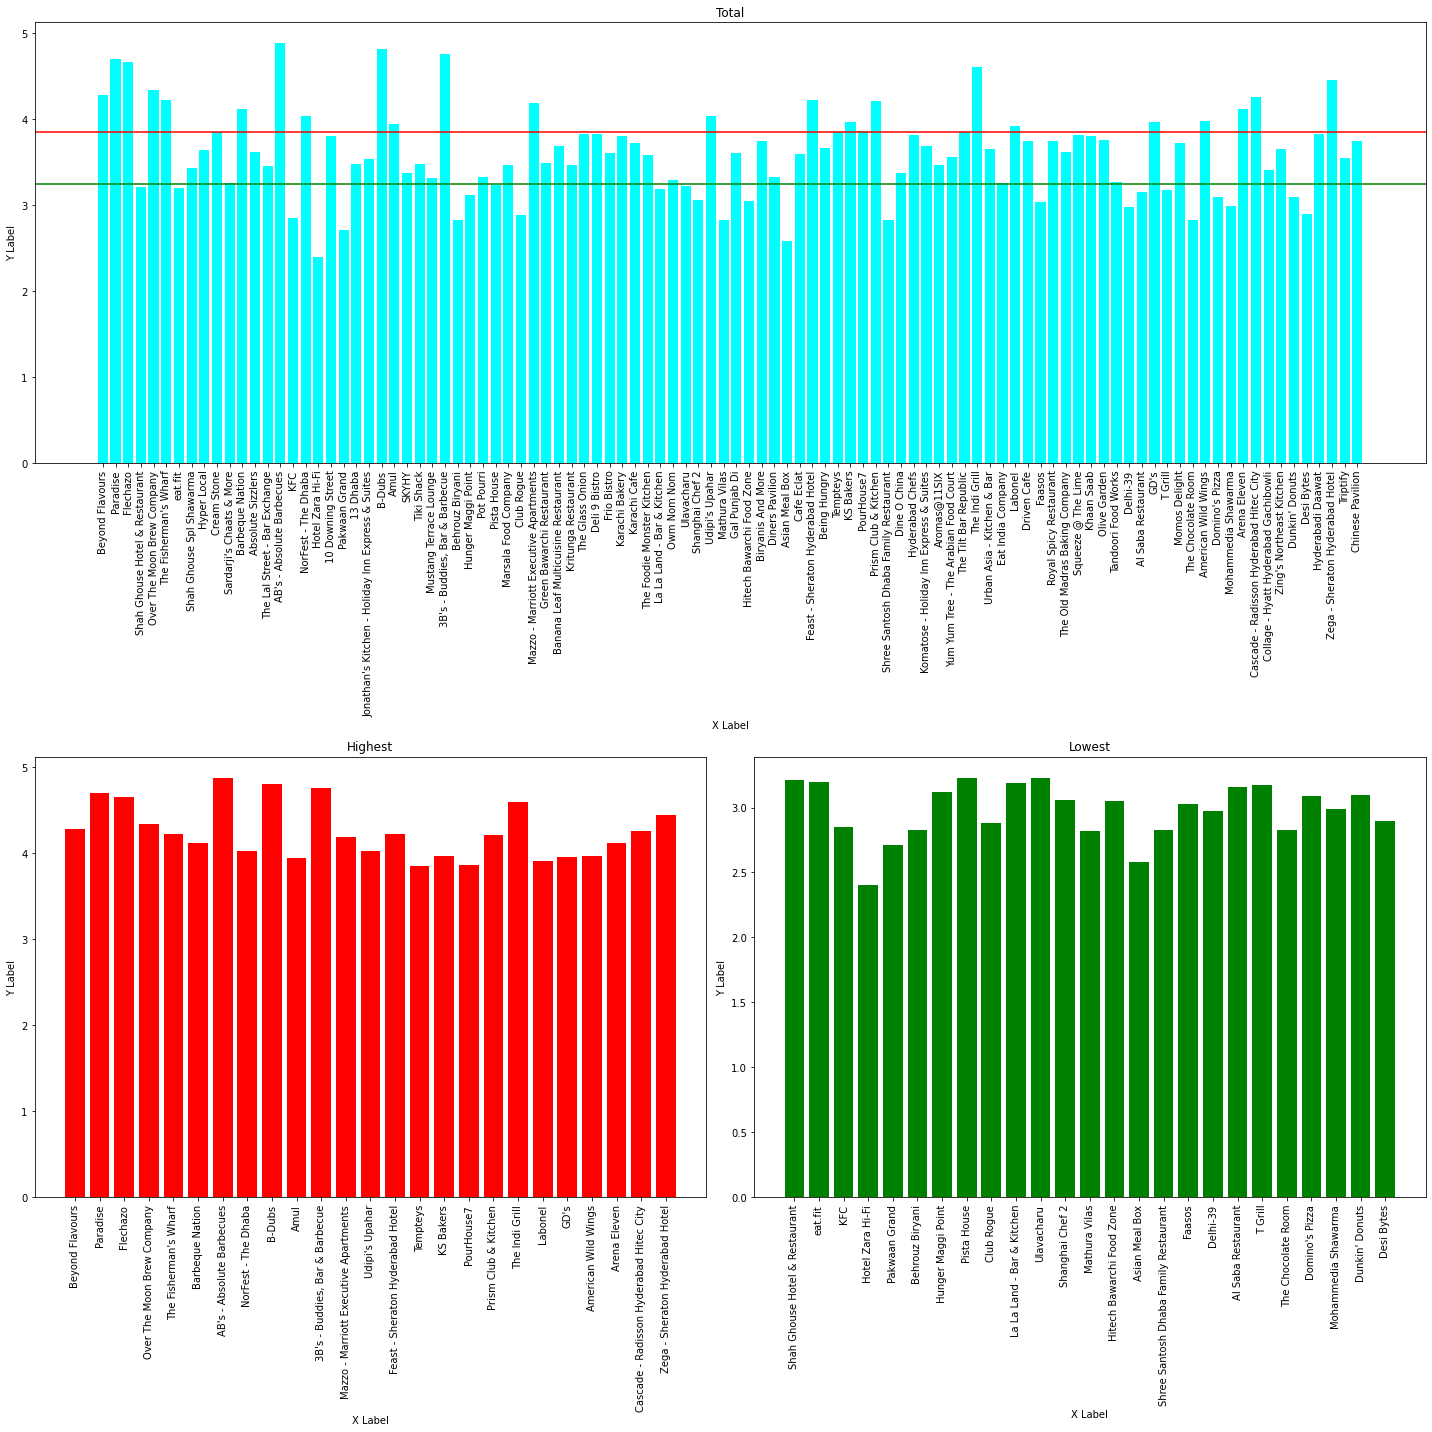

In [78]:
my_plot(rating_plot_pass)